<a href="https://colab.research.google.com/github/wonsungsoo/Final-Team2/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%9B%90%EC%84%B1%EC%88%98_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의
상황: 신규  숙박 중계 플랫폼들의 등장 (경쟁사 등장)
예상 문제: 고객 이동이 우려됨

문제 방지: 고객 이동을 방지하기 위해서는 에어비앤비만의 가치가 잘 보전되어있고 이를 통해 타 업체들과 차별점을 가져가야한다. 이를 통해 게스트 유출 방지를 도모한다
# 가설 : 도심 외곽보다 도심 중앙에 더 높은 평점들의 숙소가 분포되어있을 것이다

In [2]:
import pandas as pd

In [3]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'


plt.rcParams['axes.unicode_minus'] = False

In [23]:
df = pd.read_csv("/content/drive/MyDrive/combined_dataset.csv")

In [5]:
# # 영어 → 한국어 컬럼명 매핑
# col_map = {
#     "id": "숙소 고유 ID",
#     "listing_url": "숙소 상세 페이지 URL",
#     "scrape_id": "스크래핑 ID",
#     "last_scraped": "데이터 수집일",
#     "source": "데이터 출처",
#     "name": "숙소 이름",
#     "description": "숙소 설명",
#     "neighborhood_overview": "동네 설명",
#     "picture_url": "숙소 대표 사진 URL",
#     "host_id": "호스트 ID",
#     "host_url": "호스트 프로필 URL",
#     "host_name": "호스트 이름",
#     "host_since": "호스트 가입일",
#     "host_location": "호스트 위치",
#     "host_about": "호스트 소개",
#     "host_response_time": "호스트 응답 시간",
#     "host_response_rate": "호스트 응답률",
#     "host_acceptance_rate": "호스트 수락률",
#     "host_is_superhost": "슈퍼호스트 여부",
#     "host_thumbnail_url": "호스트 썸네일 URL",
#     "host_picture_url": "호스트 사진 URL",
#     "host_neighbourhood": "호스트 거주 동네",
#     "host_listings_count": "운영 숙소 수",
#     "host_total_listings_count": "총 운영 숙소 수",
#     "host_verifications": "호스트 인증 방법",
#     "host_has_profile_pic": "프로필 사진 여부",
#     "host_identity_verified": "신원 인증 여부",
#     "neighbourhood": "숙소 동네",
#     "neighbourhood_cleansed": "정제된 동네",
#     "neighbourhood_group_cleansed": "정제된 지역(대분류)",
#     "latitude": "위도",
#     "longitude": "경도",
#     "property_type": "숙소 유형",
#     "room_type": "방 유형",
#     "accommodates": "수용 인원",
#     "bathrooms": "욕실 개수",
#     "bathrooms_text": "욕실 설명",
#     "bedrooms": "침실 수",
#     "beds": "침대 수",
#     "amenities": "편의시설",
#     "price": "숙박 요금",
#     "minimum_nights": "최소 숙박일수",
#     "maximum_nights": "최대 숙박일수",
#     "minimum_minimum_nights": "최소 숙박일수 최솟값",
#     "maximum_minimum_nights": "최소 숙박일수 최댓값",
#     "minimum_maximum_nights": "최대 숙박일수 최솟값",
#     "maximum_maximum_nights": "최대 숙박일수 최댓값",
#     "minimum_nights_avg_ntm": "평균 최소 숙박일수",
#     "maximum_nights_avg_ntm": "평균 최대 숙박일수",
#     "calendar_updated": "달력 업데이트",
#     "has_availability": "예약 가능 여부",
#     "availability_30": "예약 가능일수(30일)",
#     "availability_60": "예약 가능일수(60일)",
#     "availability_90": "예약 가능일수(90일)",
#     "availability_365": "예약 가능일수(365일)",
#     "calendar_last_scraped": "달력 수집일",
#     "number_of_reviews": "리뷰 수",
#     "number_of_reviews_ltm": "최근 12개월 리뷰 수",
#     "number_of_reviews_l30d": "최근 30일 리뷰 수",
#     "first_review": "첫 리뷰일",
#     "last_review": "마지막 리뷰일",
#     "review_scores_rating": "평점(전체)",
#     "review_scores_accuracy": "평점(정확성)",
#     "review_scores_cleanliness": "평점(청결도)",
#     "review_scores_checkin": "평점(체크인)",
#     "review_scores_communication": "평점(소통)",
#     "review_scores_location": "평점(위치)",
#     "review_scores_value": "평점(가성비)",
#     "license": "숙소 등록 번호",
#     "instant_bookable": "즉시 예약 여부",
#     "calculated_host_listings_count": "계산된 운영 숙소 수",
#     "calculated_host_listings_count_entire_homes": "전체 집 숙소 수",
#     "calculated_host_listings_count_private_rooms": "개인실 숙소 수",
#     "calculated_host_listings_count_shared_rooms": "공유실 숙소 수",
#     "reviews_per_month": "월평균 리뷰 수"
# }

# # 컬럼명 변경
# df = df.rename(columns=col_map)

In [6]:
# # 이름변경한 파일 저장
# df.to_csv('/content/combined_dataset_KOR.csv', index=False, encoding='utf-8-sig')

#도시와 외곽지역의 리뷰 수를 살펴보기로 함

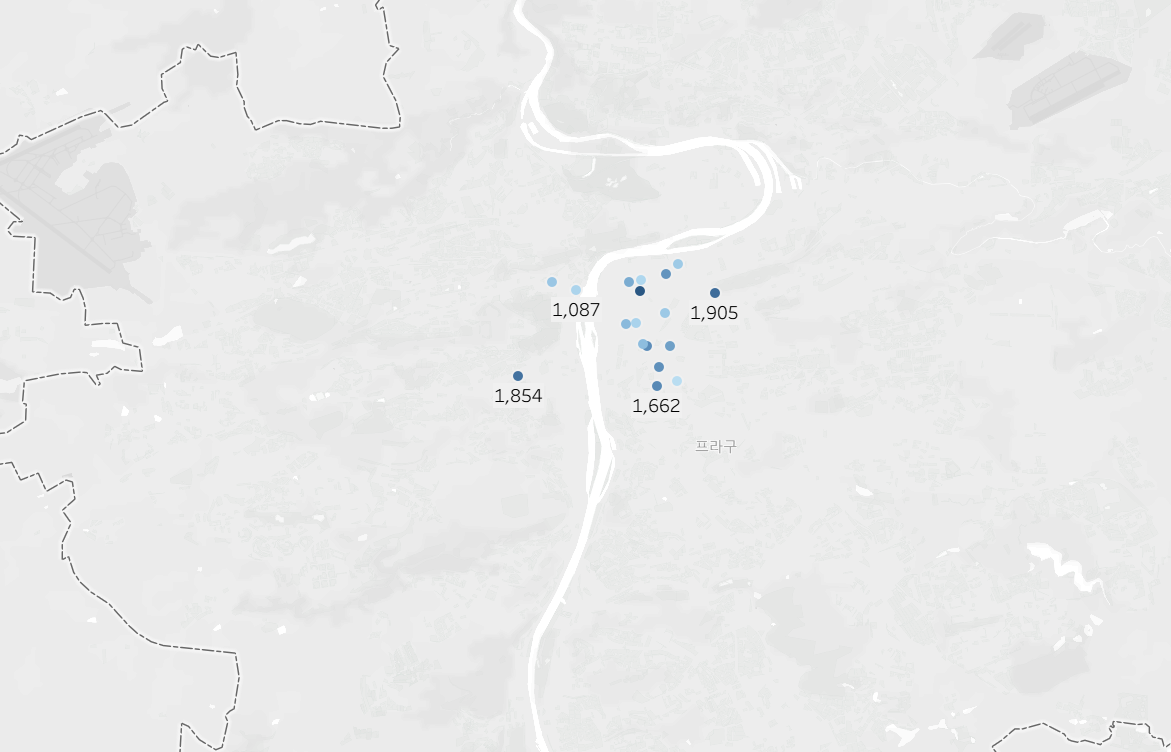

In [7]:
# 위도 경도 결측치 확인

df['latitude'].isnull().sum()
df['longitude'].isnull().sum()

np.int64(0)

리뷰를 몇개부터 보는게 적당할까? --> 평균값으로 기준점을 잡자

In [8]:
#리뷰 수 결측치 확인

df['number_of_reviews'].isnull().sum()

np.int64(0)

#

In [9]:
df['number_of_reviews'].describe()

,number_of_reviews
count,11446.000000
mean,59.958850
std,99.617144
min,0.000000
25%,3.000000
50%,18.000000
75%,70.000000
max,1801.000000


# max값이 1801인데 평균값이 59로 나오는것들 보아 0값이 많다고 생각됨
## 기준을 전체에서 3분위수 이상값들로 잡음

In [10]:
df[df['number_of_reviews'] >= 70]['number_of_reviews'].describe()

,number_of_reviews
count,2875.000000
mean,192.014957
std,123.546593
min,70.000000
25%,102.000000
50%,155.000000
75%,243.000000
max,1801.000000


### 리뷰 수가 70이상의 값들의 평균(192)을 기준으로 분포도 확인, 이 중에서 평점이 4.9점 이상인 숙소들의 분포를 확인하고자 함

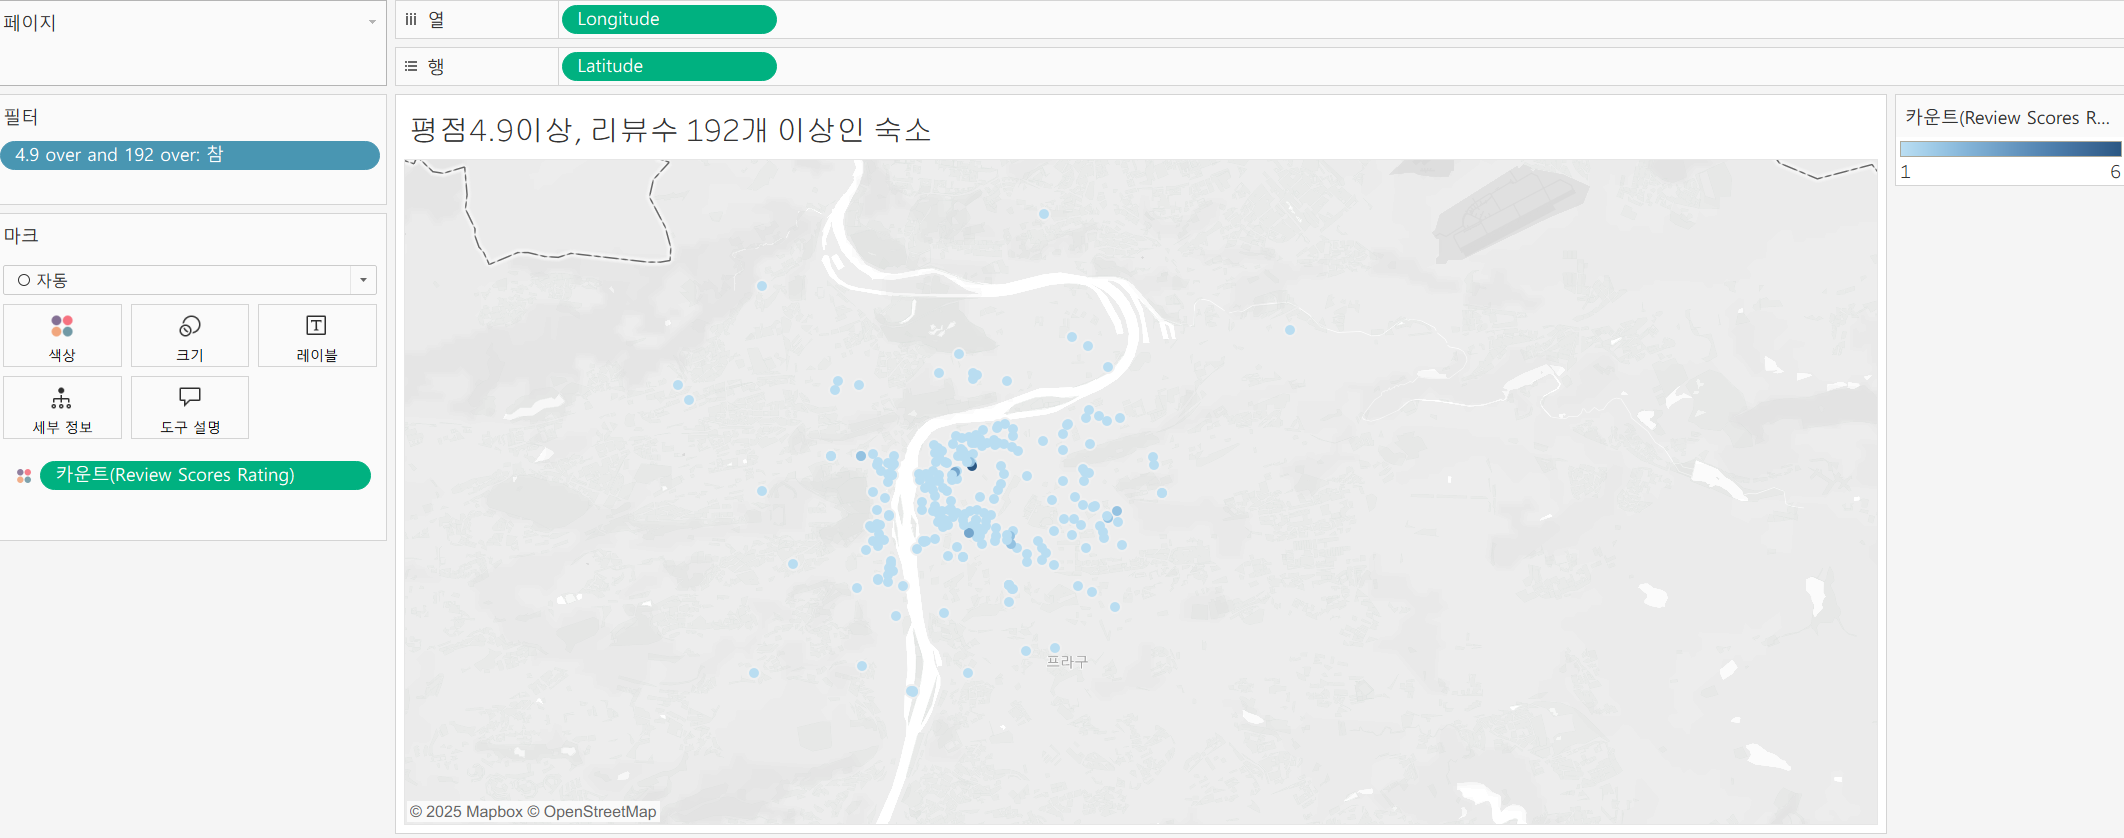

In [11]:
# 총점 개수중 결측치값 확인
df['review_scores_rating'].isnull().sum()

np.int64(1495)

In [12]:
# 총점 총개수 확인
len(df)

11446

# review_scores_rating의  갯수 11446개 中 결측치 1495개 발견
다른값으로 대체하려고 했으나 값이 없는 숙소에 대해 다루는 가설이 아니다보니 삭제하기로 결정

In [13]:
df = df.dropna(subset=['review_scores_rating'])

In [14]:
df['review_scores_rating'].isnull().sum()

np.int64(0)

In [15]:
# 결측치 제거 된 값
print(len(df))

9951


In [16]:
# CSV로 저장
df.to_csv("/content/cleaned_combined_dataset.csv", index=False)

# 추론통계 시작

In [30]:
# 평점이 4.9이상이고 리뷰수가 192개 이상으로 분류
df1=df.copy()

df1 = df1[(df1['review_scores_rating'] >= 4.9) & (df1['number_of_reviews'] >= 192)]
df1['']


,review_scores_rating
2,4.94
61,4.91
85,4.93
93,4.91
103,4.90
...,...
9130,4.94
10320,4.96
10353,4.94
10354,4.97


###1군과 other을 나눈다.


In [33]:
# 1구역과 아닌 구역을 구분하는 새 컬럼 추가
df1['Area'] = df1.apply(
    lambda row: 'District 1' if (50.081 <= row['latitude'] <= 50.096) else 'Other',
    axis=1
)

# 결과 확인
print(df1['Area'].value_counts())
df1

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Area
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.93,4.89,NaN,f,3,3,0,0,3.32,District 1
61,415145,https://www.airbnb.com/rooms/415145,20240325142220,2024-03-25,city scrape,Grand Luxury Attic Josefov - Old Town Square,FOR GROUPS PLEASE CONTACT ME BEFORE BOOKING.<b...,Nearby points of interest:<br /><br />- Jewish...,https://a0.muscache.com/pictures/miso/Hosting-...,1660663,...,4.96,4.80,NaN,f,7,7,0,0,1.63,District 1
85,628063,https://www.airbnb.com/rooms/628063,20240325142220,2024-03-25,city scrape,Atelier Loretánská no.5 / 150m from Prague Castle,Beautiful and comfortable PRIVATE Atelier with...,NaN,https://a0.muscache.com/pictures/7daa215b-2279...,3118998,...,4.89,4.88,NaN,t,3,3,0,0,2.12,District 1
93,662810,https://www.airbnb.com/rooms/662810,20240325142220,2024-03-25,city scrape,Apartment Loretanska /150m from Prague Castle,Lovely and spacious apartment only a few steps...,You will stay at the UNESCO heritage protected...,https://a0.muscache.com/pictures/fc8a724c-b061...,3118998,...,4.87,4.91,NaN,t,3,3,0,0,2.06,District 1
103,690105,https://www.airbnb.com/rooms/690105,20240325142220,2024-03-25,city scrape,The BEST place in Prague - Old Town,"The apartment is huge, filled with light, over...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,1199726,...,4.98,4.86,NaN,t,2,2,0,0,4.97,District 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9130,38973363,https://www.airbnb.com/rooms/38973363,20231220035754,2023-12-20,city scrape,Rental unit in Hlavní město Praha · ★4.94 · St...,NaN,The location is very exclusive. There are plen...,https://a0.muscache.com/pictures/prohost-api/H...,273809446,...,4.95,4.84,NaN,f,1,1,0,0,4.60,Other
10320,2245854,https://www.airbnb.com/rooms/2245854,20230624004849,2023-06-24,city scrape,Rental unit in Prague 3 · ★4.96 · 1 bedroom · ...,"Big, private room with king size bed, nice se...","We are located in nice, residential area, quie...",https://a0.muscache.com/pictures/0b8fd0fd-8791...,6516830,...,4.79,4.94,NaN,f,1,0,1,0,3.28,District 1
10353,6257954,https://www.airbnb.com/rooms/6257954,20230624004849,2023-06-24,city scrape,Rental unit in Prague · ★4.94 · 1 bedroom · 4 ...,This wonderfull newly refurbished apartment is...,Amazing neighborhood with loads of restaurants...,https://a0.muscache.com/pictures/78427789/dd2e...,32511558,...,4.77,4.90,NaN,t,1,1,0,0,2.49,Other
10354,7672814,https://www.airbnb.com/rooms/7672814,20230624004849,2023-06-24,city scrape,Tiny home in Prague · ★4.97 · 1 bedroom · 2 be...,15 min by tram / metro from city center. Detac...,NaN,https://a0.muscache.com/pictures/46dffefc-d939...,40287075,...,4.83,4.96,NaN,f,1,1,0,0,2.14,Other


### Dicstric1 과 Other에 해당하는 숙소의 개수 합으로 277개가 나왔지만 한번 더 확인하고자 시각화를 통해 확인함.
 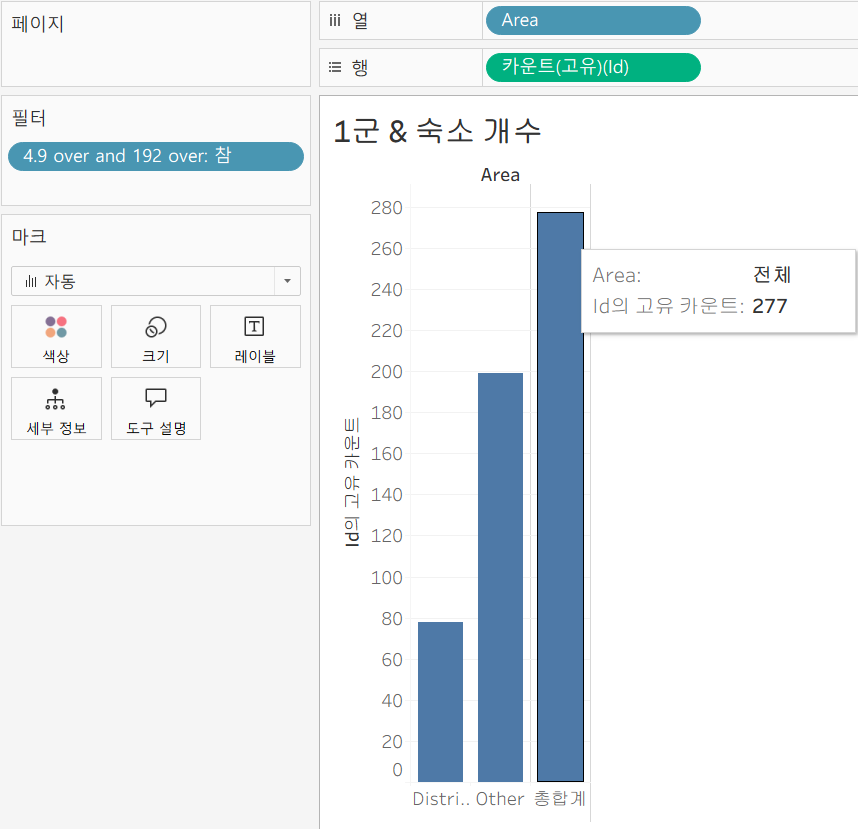

현재 내 df1 데이터셋 = 평점이 4.9이상이면서 리뷰가 192개 이상인 숙소들을 District1과 Other로 나눔

이제 이 안에서 x와 y값을 정해서 진행해야 한다

y값 : 평점
x값 : 숙소의 위치 (District1 vs Other)

# 가설 : 도심 외곽보다 도심 중앙에 더 높은 평점들의 숙소가 분포되어있을 것이다

In [41]:
# 정규성 검정부터 진행
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.datasets import load_iris

#    0. 독립변수(x), 종속변수(y) 정하기
# 성별(숙소위치) 팁(평점) : 범주 수치 ttest

# 변수 생성해서 슬라이싱해서 Area와 가져올 컬럼을 작성함. 즉, Area에 따른 컬럼 ~ 이런 식.
a = df1.loc[df1['Area'] =='District 1', 'review_scores_rating']
b = df1.loc[df1['Area'] =='Other', 'review_scores_rating']


# 샤피로 검정
Normally_a = stats.shapiro(a)
Normally_b = stats.shapiro(b)

print(Normally_a)
print(Normally_b)



# 그 두개를 t-test진행함
t_stat, p_value = stats.ttest_ind(a , b, equal_var=True)
print(t_stat)
print(p_value)
#ttest 결론 p값이 0.17이므로 0.05보다 커 귀무가설 채택하여 성별에 따라 팁이 다르지 않다!

ShapiroResult(statistic=np.float64(0.9363817175434074), pvalue=np.float64(6.579557351210499e-06))
ShapiroResult(statistic=np.float64(0.9282892677684542), pvalue=np.float64(1.713768763158942e-06))


# 정규성 검정 결과 : 둘 다 정규분포를 따르지 않음
## 정규성을 만족하지 않으니 맨휘트니 진행 (맨휘트니는 등분산성 볼 필요 없음)
맨휘트니는 비모수검정 -> 중앙값/분포를 볼 것이기에 박스플랏을 그림

# BOX-PLOT

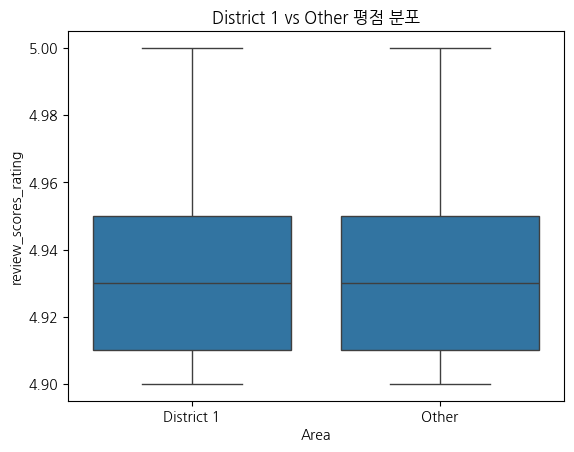

In [44]:
sns.boxplot(x='Area', y='review_scores_rating', data=df1)
plt.title("District 1 vs Other 평점 분포")
plt.show()

맨휘트니 진행 고고!